In [138]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

%matplotlib inline

/home/nurav/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [139]:
df = pd.read_csv("historical_data.csv")

In [140]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-07,37853.800781,37919.468750,37480.531250,37531.980469,37531.980469,40400.0
1,2019-10-09,37628.050781,38209.839844,37415.828125,38177.949219,38177.949219,36400.0
2,2019-10-10,38130.230469,38130.230469,37802.929688,37880.398438,37880.398438,27300.0
3,2019-10-11,37994.480469,38345.410156,37737.851563,38127.078125,38127.078125,39400.0
4,2019-10-14,38208.238281,38513.691406,38066.128906,38214.468750,38214.468750,28500.0


In [141]:
type(df['Date'][0])

str

In [142]:
df['Date'] = pd.to_datetime(df['Date'])

In [143]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-07,37853.800781,37919.468750,37480.531250,37531.980469,37531.980469,40400.0
1,2019-10-09,37628.050781,38209.839844,37415.828125,38177.949219,38177.949219,36400.0
2,2019-10-10,38130.230469,38130.230469,37802.929688,37880.398438,37880.398438,27300.0
3,2019-10-11,37994.480469,38345.410156,37737.851563,38127.078125,38127.078125,39400.0
4,2019-10-14,38208.238281,38513.691406,38066.128906,38214.468750,38214.468750,28500.0


In [144]:
df.set_index('Date',inplace=True,drop=False)

In [145]:
df.dropna(inplace=True)

In [146]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2019-10-07,2019-10-07,37853.800781,37919.468750,37480.531250,37531.980469,37531.980469,40400.0
2019-10-09,2019-10-09,37628.050781,38209.839844,37415.828125,38177.949219,38177.949219,36400.0
2019-10-10,2019-10-10,38130.230469,38130.230469,37802.929688,37880.398438,37880.398438,27300.0
2019-10-11,2019-10-11,37994.480469,38345.410156,37737.851563,38127.078125,38127.078125,39400.0
2019-10-14,2019-10-14,38208.238281,38513.691406,38066.128906,38214.468750,38214.468750,28500.0


In [147]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,37225.211525,37478.412745,36856.901574,37154.071607,37154.071607,22800.000000
std,3931.223302,3778.883336,4090.387119,3937.626025,3937.626025,18725.270495
min,26499.810547,27462.869141,25638.900391,25981.240234,25981.240234,0.000000
25%,34244.863281,34558.888672,33951.600586,34217.800781,34217.800781,14025.000000
50%,38323.064453,38555.494140,38064.070312,38303.888672,38303.888672,18750.000000
75%,40571.456055,40706.553711,40307.657227,40469.760742,40469.760742,26350.000000
max,42263.000000,42273.871094,41850.289063,41952.628906,41952.628906,188300.000000


## Using ARIMA

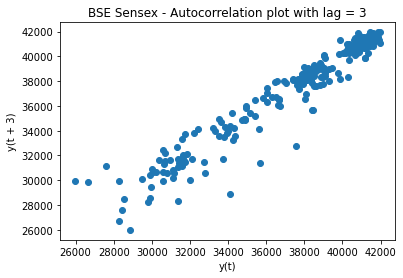

In [148]:
## Checking for Cross-correlation

plt.figure()
lag_plot(df['Close'], lag=3)
plt.title('BSE Sensex - Autocorrelation plot with lag = 3')
plt.show()

#### There is an auto correlation for lag=3 (i.e the data of current day is correlated to previous 3 days' data)

## Visualize Plot

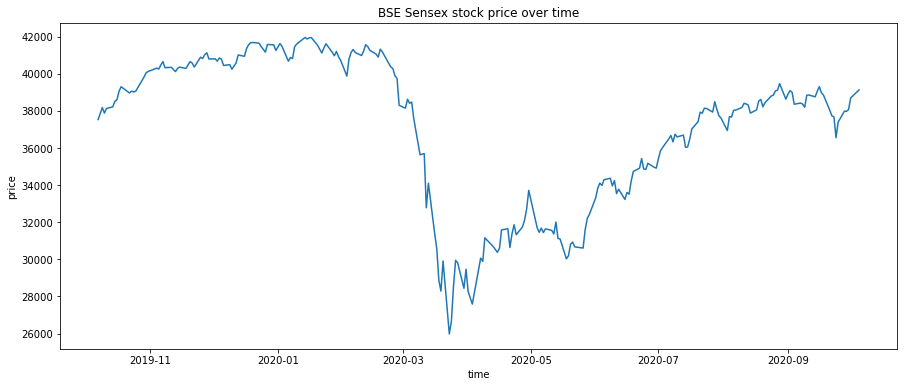

In [149]:
plt.figure(figsize=(15,6))
plt.plot(df["Close"])
plt.title("BSE Sensex stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [150]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 158845.59647616316


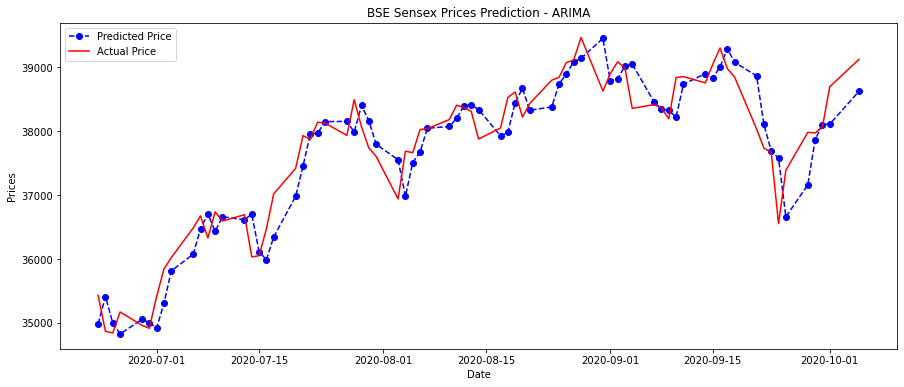

In [152]:
# Plotting the actual and predicted price

plt.figure(figsize=(15,6))
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('BSE Sensex Prices Prediction - ARIMA')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

## Using LSTM

In [54]:
stock1 = df["Close"].copy()
stock1 = pd.DataFrame(stock1)

In [55]:
stock1

,Close
Date,
2019-10-07,37531.980469
2019-10-09,38177.949219
2019-10-10,37880.398438
2019-10-11,38127.078125
2019-10-14,38214.468750
...,...
2020-09-28,37981.628906
2020-09-29,37973.218750
2020-09-30,38067.929688


In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(stock1)

In [58]:
df1.shape

(246, 1)

In [77]:
## Train test split

train_size = int(len(df1)*0.7)
test_size = len(df1) - train_size
train_data,test_data=df1[0:train_size,:],df1[train_size:len(df1),:1]

In [78]:
train_size,test_size

(172, 74)

In [79]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [80]:
time_step = 30
Xtrain, ytrain = create_dataset(train_data, time_step)
Xtest, ytest = create_dataset(test_data, time_step)

In [81]:
print(Xtrain.shape), print(ytrain.shape)

(141, 30)
(141,)


(None, None)

In [82]:
print(Xtest.shape), print(ytest.shape)

(43, 30)
(43,)


(None, None)

In [83]:
# reshape input to be [samples, time steps, features] which is required for LSTM
Xtrain =Xtrain.reshape(Xtrain.shape[0],Xtrain.shape[1] , 1)
Xtest = Xtest.reshape(Xtest.shape[0],Xtest.shape[1] , 1)

In [84]:
Xtrain[:10]

array([[[0.72321452],
        [0.76365989],
        [0.74502966],
        [0.76047476],
        [0.76594645],
        [0.78420542],
        [0.79002198],
        [0.8183896 ],
        [0.8338122 ],
        [0.81286605],
        [0.81881345],
        [0.8164068 ],
        [0.81876527],
        [0.86721323],
        [0.88098982],
        [0.88582219],
        [0.888075  ],
        [0.89664844],
        [0.89328427],
        [0.907156  ],
        [0.91867391],
        [0.89800389],
        [0.89934809],
        [0.88500873],
        [0.89567918],
        [0.90007522],
        [0.89553585],
        [0.90715086],
        [0.91854257],
        [0.91375471]],

       [[0.76365989],
        [0.74502966],
        [0.76047476],
        [0.76594645],
        [0.78420542],
        [0.79002198],
        [0.8183896 ],
        [0.8338122 ],
        [0.81286605],
        [0.81881345],
        [0.8164068 ],
        [0.81876527],
        [0.86721323],
        [0.88098982],
        [0.88582219],
        

In [85]:

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [86]:

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(30,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [87]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 50)            10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.fit(Xtrain,ytrain,validation_data=(Xtest,ytest),epochs=100,batch_size=16,verbose=1)

Epoch 1/100
9/9 [==============================] - 1s 123ms/step - loss: 0.2332 - val_loss: 0.0106
Epoch 2/100
9/9 [==============================] - 0s 27ms/step - loss: 0.0404 - val_loss: 0.0305
Epoch 3/100
9/9 [==============================] - 0s 26ms/step - loss: 0.0357 - val_loss: 0.0027
Epoch 4/100
9/9 [==============================] - 0s 26ms/step - loss: 0.0362 - val_loss: 0.0094
Epoch 5/100
9/9 [==============================] - 0s 26ms/step - loss: 0.0296 - val_loss: 0.0028
Epoch 6/100
9/9 [==============================] - 0s 27ms/step - loss: 0.0273 - val_loss: 0.0022
Epoch 7/100
9/9 [==============================] - 0s 26ms/step - loss: 0.0246 - val_loss: 0.0163
Epoch 8/100
9/9 [==============================] - 0s 27ms/step - loss: 0.0235 - val_loss: 0.0021
Epoch 9/100
9/9 [==============================] - 0s 34ms/step - loss: 0.0204 - val_loss: 0.0039
Epoch 10/100
9/9 [==============================] - 0s 25ms/step - loss: 0.0170 - val_loss: 0.0102
Epoch 11/100
9/9 [

Epoch 84/100
9/9 [==============================] - 0s 24ms/step - loss: 0.0032 - val_loss: 0.0025
Epoch 85/100
9/9 [==============================] - 0s 23ms/step - loss: 0.0042 - val_loss: 0.0023
Epoch 86/100
9/9 [==============================] - 0s 24ms/step - loss: 0.0041 - val_loss: 0.0047
Epoch 87/100
9/9 [==============================] - 0s 26ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 88/100
9/9 [==============================] - 0s 25ms/step - loss: 0.0032 - val_loss: 0.0048
Epoch 89/100
9/9 [==============================] - 0s 26ms/step - loss: 0.0039 - val_loss: 0.0054
Epoch 90/100
9/9 [==============================] - 0s 28ms/step - loss: 0.0031 - val_loss: 0.0048
Epoch 91/100
9/9 [==============================] - 0s 28ms/step - loss: 0.0036 - val_loss: 0.0050
Epoch 92/100
9/9 [==============================] - 0s 30ms/step - loss: 0.0033 - val_loss: 0.0040
Epoch 93/100
9/9 [==============================] - 0s 30ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 94/1

In [89]:
### Prediction and check performance metrics
train_predict=model.predict(Xtrain)
test_predict=model.predict(Xtest)

In [90]:
### Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [91]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(ytrain,train_predict))

37036.475545950365

In [92]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

38338.64238320223

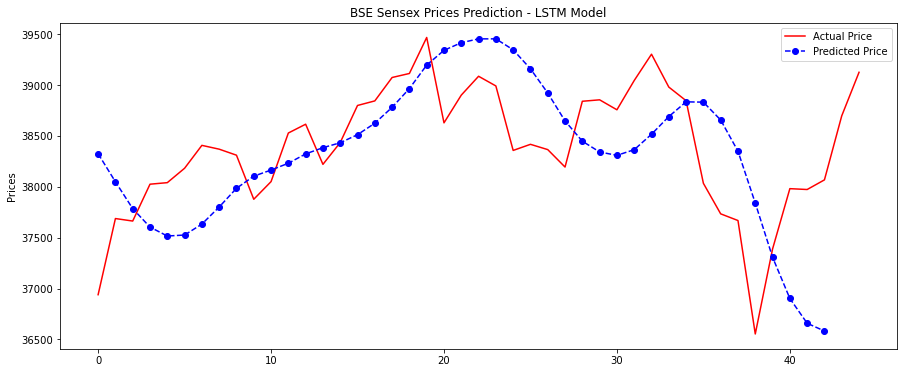

In [153]:
plt.figure(figsize=(15,6))
plt.plot(scaler.inverse_transform(df1[201:,]),color='red', label='Actual Price')
plt.plot(test_predict, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.title('BSE Sensex Prices Prediction - LSTM Model')
plt.ylabel('Prices')
plt.legend()
plt.show()

## ARIMA provides a better result than a LSTM model.